# **Stroke Prediction**

Dataset : https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

Using stroke prediction dataset, different classification models were tested to determine which model achieve the highest accuracy. 


* RandomForestClassifier
* KNeighborsClassifier
* LogisticRegression



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


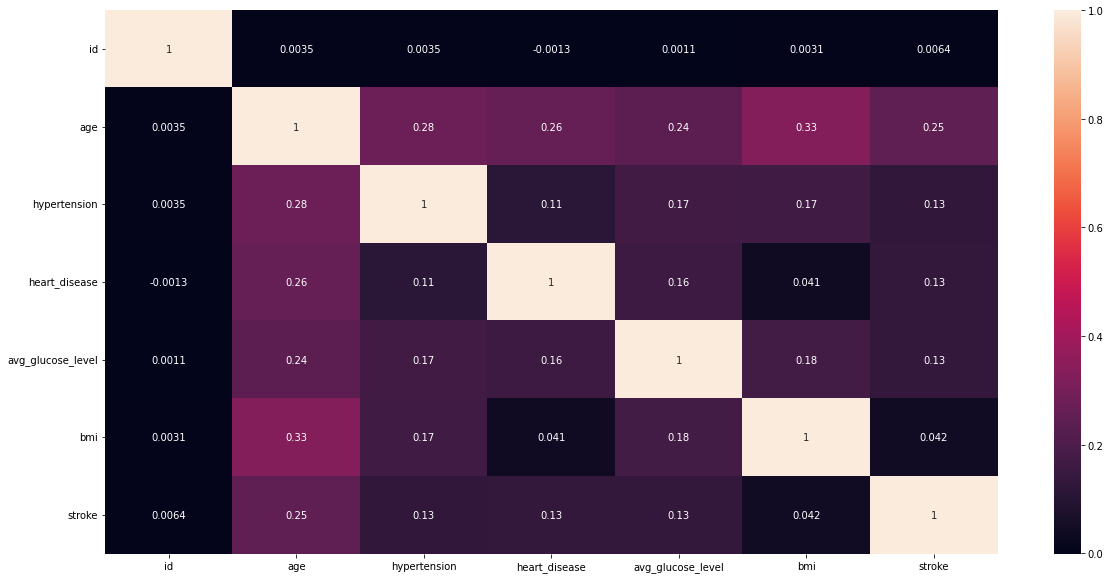

In [3]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)

In [4]:
df.drop('id', axis=1, inplace=True) #unnecessary for the model

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
df.isna().sum() 

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

For 'BMI' column, NaN was filled with the mean value.

In [7]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean()) 

## **Data PreProcessing**

#### Encoding Categorical Data

In [8]:
lab = LabelEncoder()
df['gender'] = lab.fit_transform(df['gender'])
df['ever_married'] = lab.fit_transform(df['ever_married'])
df['work_type'] = lab.fit_transform(df['work_type'])
df['Residence_type'] = lab.fit_transform(df['Residence_type'])
df['smoking_status'] = lab.fit_transform(df['smoking_status'])

In [9]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


#### Feature Scaling

In [10]:
std = StandardScaler()
columns = ['age', 'avg_glucose_level', 'bmi', ]
scaled = std.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

In [11]:
def feature_scale(column_name):
  temp = std.fit_transform(df[column_name])
  return pd.DataFrame(temp, columns=columns)

temp = feature_scale(['age', 'avg_glucose_level', 'bmi'])
df = pd.concat([temp, df[df.columns.difference(temp.columns)]], axis=1)

In [12]:
df

,age,avg_glucose_level,bmi,Residence_type,ever_married,gender,heart_disease,hypertension,smoking_status,stroke,work_type
0,1.051434,2.706375,1.001234e+00,1,1,1,1,0,1,1,2
1,0.786070,2.121559,1.384666e-15,0,1,0,0,0,2,1,3
2,1.626390,-0.005028,4.685773e-01,0,1,1,1,0,2,1,2
3,0.255342,1.437358,7.154182e-01,1,1,0,0,0,3,1,2
4,1.582163,1.501184,-6.357112e-01,0,1,0,0,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...
5105,1.626390,-0.494658,1.384666e-15,1,1,0,0,1,2,0,2
5106,1.670617,0.420775,1.442949e+00,1,1,0,0,0,2,0,3
5107,-0.363842,-0.511443,2.217363e-01,0,1,0,0,0,2,0,3
5108,0.343796,1.328257,-4.278451e-01,0,1,1,0,0,1,0,2


#### Splitting the Dataset into Training Set VS Test Set

In [13]:
X = df.drop(['stroke'], axis=1)
y = df['stroke'].values

In [14]:
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [15]:
accuracy_df = pd.DataFrame(columns = ['Classifier', 'Accuracy'])

In [16]:
random_forest = RandomForestClassifier(n_estimators = 200) 
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_score = metrics.accuracy_score(y_test, y_pred)
accuracy_df = accuracy_df.append({'Classifier': 'RandomForest', 'Accuracy': acc_score}, ignore_index=True)

In [17]:
k_neighbors = KNeighborsClassifier()
k_neighbors.fit(X_train, y_train)
y_pred = k_neighbors.predict(X_test)
acc_score = metrics.accuracy_score(y_test, y_pred)
accuracy_df.append({'Classifier': 'K-Neighbors', 'Accuracy': acc_score}, ignore_index=True)

,Classifier,Accuracy
0,RandomForest,0.954012
1,K-Neighbors,0.953033
